<a href="https://colab.research.google.com/github/Roman3173/RomanGo/blob/main/Test%20cases/Ebook%20subscription%20service/retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание

Задание обнаружено в интернете.

В июле провели специальную акцию, направленную на улучшение ретеншена. Новым юзерам слали письмо с купоном. Сработала ли акция?

# Подготовка и оценка данных

In [1]:
!gdown 18CZKLXpbZfR44SunmzSuFvc0kI9U8n_K

Downloading...
From: https://drive.google.com/uc?id=18CZKLXpbZfR44SunmzSuFvc0kI9U8n_K
To: /content/analyst_test_transactions_db.csv
100% 3.07M/3.07M [00:00<00:00, 29.7MB/s]


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=2,style="whitegrid",rc={'figure.figsize':(12,6)} )

In [3]:
df = pd.read_csv('/content/analyst_test_transactions_db.csv')

In [4]:
df

,user_id,order_id,reg_date,transaction_date,revenue
0,57562,94545.0,2013-12-22,2015-07-16,1088
1,40047,81824.0,2013-11-24,2015-01-19,1027
2,48153,144851.0,2015-07-03,2015-10-29,601
3,54591,116111.0,2013-07-12,2015-04-30,881
4,39789,134943.0,2013-05-25,2015-07-21,984
...,...,...,...,...,...
76852,36921,163682.0,2015-01-15,2015-03-28,1095
76853,31360,145146.0,2015-01-04,2015-08-09,547
76854,56195,8929.0,2012-09-18,2015-11-12,850
76855,46362,78673.0,2015-02-20,2015-07-21,356


In [5]:
df.dtypes

user_id               int64
order_id            float64
reg_date             object
transaction_date     object
revenue               int64
dtype: object

In [6]:
df['reg_date'] = pd.to_datetime(df['reg_date'],format='%Y-%m-%d')
df['transaction_date'] = pd.to_datetime(df['transaction_date'],format='%Y-%m-%d')

In [7]:
# order_id -- primaty key (unique values)
df.nunique()

user_id             48214
order_id            76857
reg_date             1363
transaction_date      324
revenue              1630
dtype: int64

In [8]:
# пропуски отсутствуют
df.isna().mean()

user_id             0.0
order_id            0.0
reg_date            0.0
transaction_date    0.0
revenue             0.0
dtype: float64

In [9]:
# проверка числовых значени. Везде есть отрицательные значения.
df.describe()

,user_id,order_id,revenue
count,76857.000000,76857.000000,76857.000000
mean,50112.561120,99950.627984,1000.587559
std,20051.576685,53283.741305,248.729287
min,-37599.000000,-138325.000000,-146.000000
25%,36575.000000,62909.000000,832.000000
50%,50145.000000,100145.000000,1001.000000
75%,63716.000000,136997.000000,1168.000000
max,138987.000000,305790.000000,2069.000000


<Axes: >

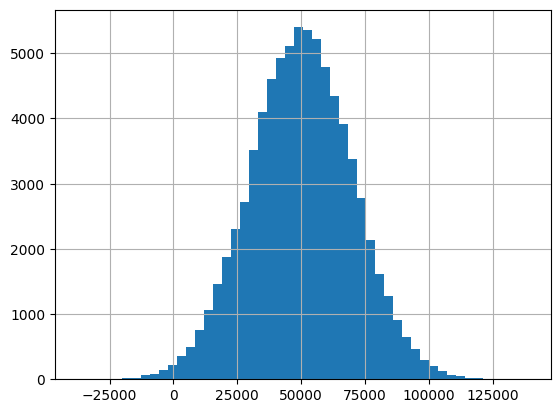

In [10]:
# Все числовые поля -- нормально распределены, есть отрицательные значения, почти наверняка сгенерированы.
df['user_id'].hist(bins = 50)
#df['order_id'].hist(bins = 50)
#df['revenue'].hist(bins = 50)

In [11]:
# среди дат регистрации есть 53 значения "1900-01-01".
df.groupby(['reg_date'])['user_id'].count()

reg_date
1900-01-01    53
2012-02-24     2
2012-02-27     3
2012-02-29     4
2012-03-01    25
              ..
2015-11-16    34
2015-11-17    22
2015-11-18    28
2015-11-19    28
2015-11-20    15
Name: user_id, Length: 1363, dtype: int64

In [12]:
# выглядит как намеренно добавленные выбросы.
df[df['reg_date'] == '1900-01-01'].head(5)

,user_id,order_id,reg_date,transaction_date,revenue
213,36712,101563.0,1900-01-01,2015-03-16,730
618,70279,15034.0,1900-01-01,2015-03-21,453
3264,39784,150462.0,1900-01-01,2015-09-10,621
3410,35477,82595.0,1900-01-01,2015-06-24,945
5264,56337,40840.0,1900-01-01,2015-04-04,1058


<Axes: >

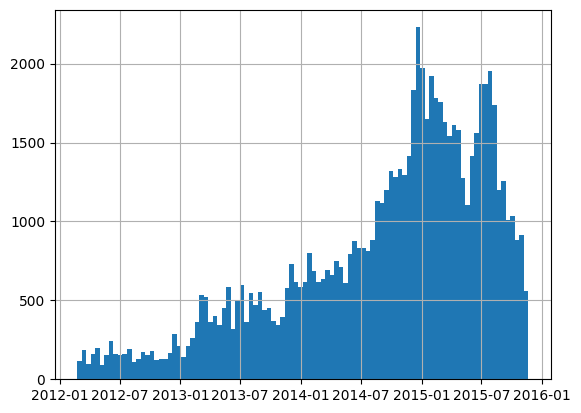

In [13]:
df[df['reg_date'] != '1900-01-01']['reg_date'].hist(bins = 100)

<Axes: >

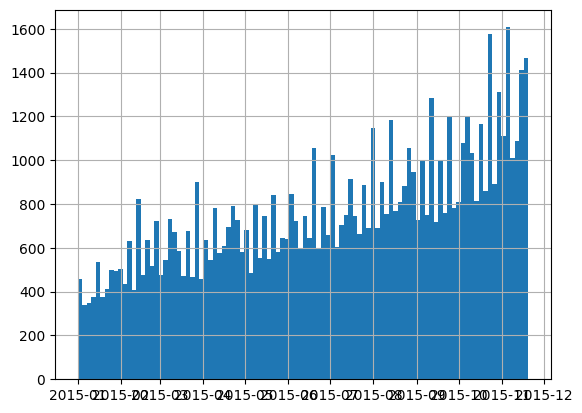

In [14]:
# явно восходящий тренд
df['transaction_date'].hist(bins = 100)

In [15]:
# основываясь на подозрении о сгенерированности данных, решил проверить пользователей.
df.groupby('user_id').count().sort_values(by = 'order_id')

,order_id,reg_date,transaction_date,revenue
user_id,,,,
-37599,1,1,1,1
58701,1,1,1,1
58693,1,1,1,1
58690,1,1,1,1
58685,1,1,1,1
...,...,...,...,...
45576,8,8,8,8
60237,8,8,8,8
54441,8,8,8,8


In [16]:
# в 1 пользователя на 9 заказов 9 дат регистрации.
df[df['user_id'] == 46832].sort_values(by = 'reg_date')

,user_id,order_id,reg_date,transaction_date,revenue
14143,46832,116348.0,2013-10-25,2015-06-16,1325
65498,46832,119859.0,2014-01-13,2015-02-19,1093
11357,46832,168631.0,2014-01-27,2015-05-06,906
55924,46832,119140.0,2014-04-30,2015-07-29,1251
18583,46832,54590.0,2014-09-12,2015-07-31,1254
633,46832,120641.0,2014-10-11,2015-11-07,535
27617,46832,106417.0,2014-10-23,2015-03-03,1032
52091,46832,110713.0,2015-02-15,2015-11-12,1344
20814,46832,-10657.0,2015-04-17,2015-08-06,656


In [17]:
# дополнительные манипуляции с данными, объяснение -- ниже
df = df[df['reg_date'].dt.year == 2015]

In [18]:
# корректировка "reg_date"
t = df.groupby('user_id')['reg_date'].min().reset_index()

In [19]:
df = df.merge(t, how = 'left', on = 'user_id').rename(columns = {'reg_date_y': 'reg_date'})[['user_id',	'order_id',	'reg_date',	'transaction_date',	'revenue']]

In [20]:
# Так как по "reg_date" и "transaction_date" важны данные только за 2015 год и только месяцы, то их и оставляем
df['transaction_date'] = df['transaction_date'].dt.month

In [21]:
df['reg_date'] = df['reg_date'].dt.month

In [22]:
df.rename(columns = {'transaction_date': 'transaction_month', 'reg_date': 'reg_month'}, inplace = True)

In [23]:
df

,user_id,order_id,reg_month,transaction_month,revenue
0,48153,144851.0,7,10,601
1,72102,84827.0,8,11,946
2,61469,54728.0,3,11,872
3,55963,114131.0,1,8,1004
4,42432,129397.0,6,9,442
...,...,...,...,...,...
34431,82072,63328.0,8,8,881
34432,36921,163682.0,1,3,1095
34433,31360,145146.0,1,8,547
34434,46362,78673.0,1,7,356


Оценка полученных данных:

* user_id, order_id, revenue -- явно сгенерированные данные (нормальное распределение). Все 3 временами приобретают отрицательное значение, что не так и важно для рассчёта retention.
* order_id -- уникальное значение для датафрейма.
* user_id -- id основной изучаемой сущности.
* reg_date, transaction_date -- преобразованы в datetime формат.
* reg_date -- также случайно сгенерированное значение месяца, что приводит к грустному результату: у каждого пользователя для каждого его заказа своя дата регистрации. В условиях отсутствия возможности уточнить у выгрузившего данные специалиста, предлагаю интерпретировать это как: сбой даты регистрации, нужно привести данные в должный вид и заменить дату регистрации на самую раннюю для каждого пользователя.
* reg_date имеет выбросы: есть 53 записи с датой "1900-01-01". Предлагаю их не учитывать (53 записи из 76857 погоды не сделают).
* transaction_date есть только за 2015 год, наблюдается явно восходящий тренд как до июля, так и после него.

Дополнительные манипуляции с данными:
1. Так как reg_date -- значение месяца, то retention можно посчитать только по периоду с шагом минимум в месяц.
2. Так как транзакции есть только за 2015 год, а акция прошла в июле, то будет достаточно рассчитывать retention только для пользователей, пришедших в 2015-ом году (6 месяцев до акции и 5 после).

# Расчёт retention
Так как данных не очень много (11 месяцев и ~27к пользователей), можно создать шаблон и с ним соединить основную таблицу, получив отметки по месяцам была ли в этом месяце у конкретного пользователя хотя бы 1 покупка или нет.

In [24]:
users = df.groupby('user_id')['reg_month'].min().reset_index()
users

,user_id,reg_month
0,-37599,1
1,-32239,11
2,-29822,7
3,-25337,4
4,-23603,7
...,...,...
27444,125385,2
27445,128006,1
27446,128964,10
27447,130617,2


In [25]:
month_ = pd.DataFrame({'month': [x for x in range(1, 12)]})
month_

,month
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [26]:
# создание таблицы-шаблона
t2 = pd.merge(users, month_, how = 'cross')

In [27]:
t2

,user_id,reg_month,month
0,-37599,1,1
1,-37599,1,2
2,-37599,1,3
3,-37599,1,4
4,-37599,1,5
...,...,...,...
301934,132484,6,7
301935,132484,6,8
301936,132484,6,9
301937,132484,6,10


In [28]:
trans_per_month = df.groupby(['user_id','transaction_month'])['revenue'].count().reset_index()

In [29]:
trans_per_month.rename(columns = {'transaction_month': 'month'}, inplace = True)

In [30]:
# создание таблицы с указанием был ли активным пользователь в конкретном месяце
report = t2.merge(trans_per_month, on=['user_id', 'month'], how='left')

In [31]:
report['active'] = (report['revenue'] > 0) * 1

In [32]:
report

,user_id,reg_month,month,revenue,active
0,-37599,1,1,NaN,0
1,-37599,1,2,NaN,0
2,-37599,1,3,1.0,1
3,-37599,1,4,NaN,0
4,-37599,1,5,NaN,0
...,...,...,...,...,...
301934,132484,6,7,NaN,0
301935,132484,6,8,1.0,1
301936,132484,6,9,NaN,0
301937,132484,6,10,NaN,0


In [33]:
retention = report.pivot_table(index='reg_month',columns='month',values='active',aggfunc='mean')

# Результат и выводы

Были построены сводная таблица ретеншена по месяцам в 2015 году, а также на основании неё -- heatmap.

Заключение: вне рамок акции можно наблюдать рост удержания от месяца к месяцу (см. гистограмму в конце файла), также можно наблюдать ускорение роста в начиная с июля-августа.

Есть искушение объявить, что рост -- результат акции с купоном, но:
* до акции конверсия регистрации в покупку в первый месяц после регистрации постепенно росла;
* основной скачок покупок наблюдается не в июле, а значительно позже с пиком в ноябре (если это влияние купонов, то что это были за купоны такие волшебные?).

Поэтому стоит быть аккуратным, есть вероятность наблюдения ситуации: "'После' -- не значит 'вследствие'"

In [34]:
# "retention" меньше 1 в месяц регистрации объясняется спецификой подсчёта "retention" в рамках текущего исследования:
# активность пользователя определяется купил ли он что-то в конкретный месяц, не все пользователи что-то покупают в месяц регистрации
retention

month,1,2,3,4,5,6,7,8,9,10,11
reg_month,,,,,,,,,,,
1,0.1205,0.118050,0.126378,0.119030,0.117071,0.120500,0.129317,0.133480,0.136419,0.157237,0.116091
2,0.0000,0.140434,0.138649,0.134484,0.121690,0.121392,0.127343,0.132996,0.143112,0.167807,0.117822
3,0.0000,0.000000,0.169906,0.144201,0.127273,0.125705,0.142320,0.152665,0.144201,0.170533,0.124451
4,0.0000,0.000000,0.000000,0.186243,0.170018,0.152381,0.136508,0.165079,0.148501,0.173898,0.131922
5,0.0000,0.000000,0.000000,0.000000,0.238861,0.178686,0.154341,0.152044,0.157556,0.176390,0.139642
6,0.0000,0.000000,0.000000,0.000000,0.000000,0.256827,0.212177,0.187085,0.174539,0.195203,0.146125
7,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.278776,0.331757,0.183538,0.191422,0.133081
8,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.423160,0.267757,0.229875,0.157985
9,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.435191,0.376957,0.224170


<Axes: xlabel='month', ylabel='reg_month'>

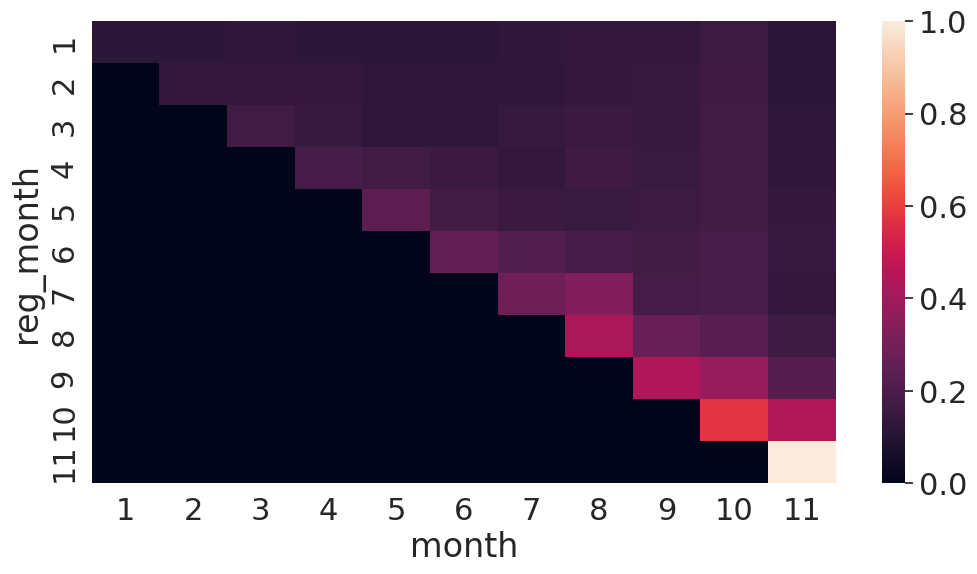

In [37]:
sns.heatmap(retention)

In [41]:
temp = pd.read_csv('/content/analyst_test_transactions_db.csv')

In [42]:
temp['transaction_date'] = pd.to_datetime(temp['transaction_date'],format='%Y-%m-%d')

<Axes: >

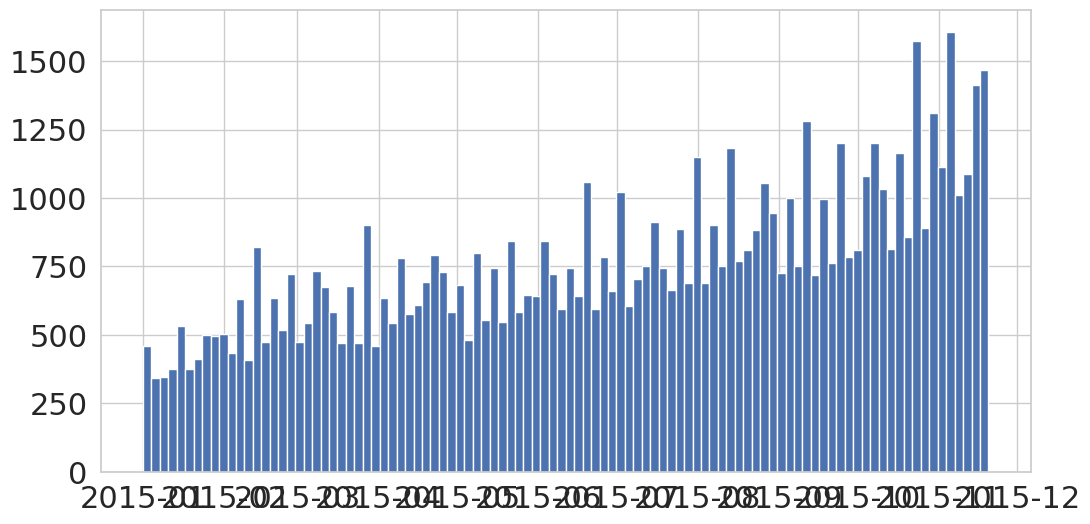

In [44]:
temp['transaction_date'].hist(bins = 100)